In [ ]:
from google.colab import drive
drive.mount('/content/BCI_2a')


Mounted at /content/BCI_2a


In [ ]:
%%capture
!pip install mne

In [ ]:
import mne

In [ ]:
raw=mne.io.read_raw_gdf('/content/BCI_2a/MyDrive/BCI_2a/A01T.gdf',
                         eog=['EOG-left', 'EOG-central', 'EOG-right'])
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

Extracting EDF parameters from /content/BCI_2a/MyDrive/BCI_2a/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Measurement date,"January 17, 2005 12:00:00 GMT"
Experimenter,Unknown
Participant,A01
Digitized points,Not available
Good channels,22 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [ ]:
events=mne.events_from_annotations(raw)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


In [ ]:
raw.annotations

<Annotations | 603 segments: 1023 (15), 1072 (1), 276 (1), 277 (1), 32766 ...>

In [ ]:
events

(array([[     0,      0,      5],
        [     0,      0,      3],
        [ 29683,      0,      5],
        ...,
        [670550,      0,      6],
        [670550,      0,      1],
        [671050,      0,      7]]),
 {'1023': 1,
  '1072': 2,
  '276': 3,
  '277': 4,
  '32766': 5,
  '768': 6,
  '769': 7,
  '770': 8,
  '771': 9,
  '772': 10})

In [ ]:
events[0][0:20]

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       [ 29683,      0,      4],
       [ 49955,      0,      5],
       [ 49955,      0,      2],
       [ 91518,      0,      5],
       [ 91868,      0,      6],
       [ 92368,      0,     10],
       [ 93871,      0,      6],
       [ 94371,      0,      9],
       [ 95789,      0,      6],
       [ 96289,      0,      8],
       [ 97741,      0,      6],
       [ 98241,      0,      7],
       [ 99749,      0,      6],
       [100249,      0,      7],
       [101860,      0,      6],
       [102360,      0,      8],
       [103777,      0,      6]])

In [ ]:
events=mne.events_from_annotations(raw)
events[1]

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


{'1023': 1,
 '1072': 2,
 '276': 3,
 '277': 4,
 '32766': 5,
 '768': 6,
 '769': 7,
 '770': 8,
 '771': 9,
 '772': 10}

From the paper
'1023': 1 (Rejected trial),

'1072': 2 (Eye movements),

'276': 3 (eyes open)),

'277': 4 (eyes closed),

'32766':5 (Start of a new run),

'768': 6 (Start of a trial),

'769': 7 (class 1),

'770': 8 (class 2),

'771': 9 (class 3),

'772': 10 (class 4)

In [ ]:
event_dict={
 'reject':1,
 'eye move':2,
 'eye open':3,
 'eye close':4,
 'new run':5,
 'new trial':6,
 'class 1':7,
 'class 2':8,
 'class 3':9,
 'class 4':10,

}

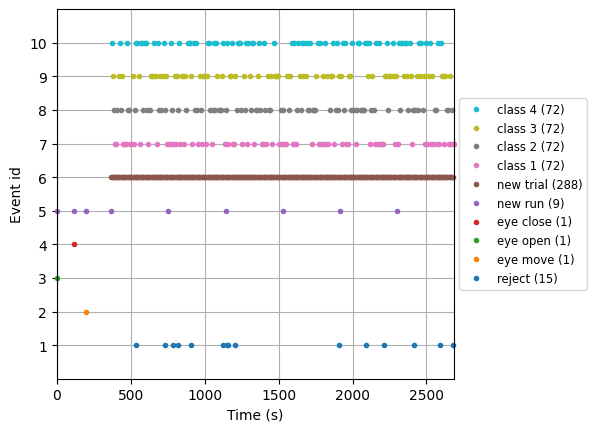

In [ ]:
fig = mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

In [ ]:
epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],tmin= -0.1, tmax=0.7, preload=True)


Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 288 events and 201 original time points ...
0 bad epochs dropped


In [ ]:
epochs.get_data().shape

<ipython-input-13-79b916371608>:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data().shape


(288, 22, 201)

In [ ]:
label=epochs.events[:,-1]
len(label)

288

In [ ]:
evoked_0 = epochs['7'].average()
evoked_1 = epochs['8'].average()
evoked_2 = epochs['9'].average()
evoked_3 = epochs['10'].average()

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


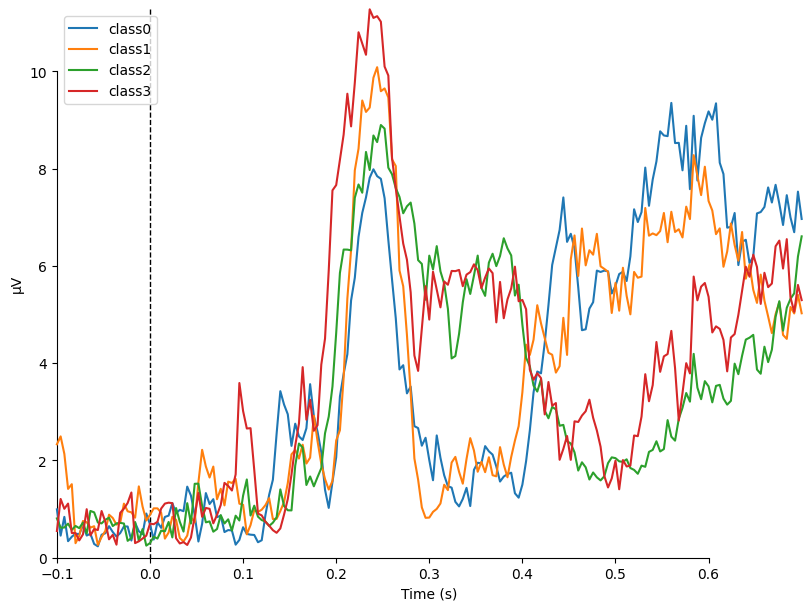

[<Figure size 800x600 with 1 Axes>]

In [ ]:
#left,right,foot,tongue
dicts={'class0':evoked_0,'class1':evoked_1,'class2':evoked_2,'class3':evoked_3}
mne.viz.plot_compare_evokeds(dicts)

In [ ]:
def read_data(path):
  raw=mne.io.read_raw_gdf(path,preload=True,
                          eog=['EOG-left', 'EOG-central', 'EOG-right'])
  raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
  raw.set_eeg_reference()
  events=mne.events_from_annotations(raw)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn')
  labels=epochs.events[:,-1]
  features=epochs.get_data()
  return features,labels

In [ ]:
%%capture
features,labels,groups=[],[],[]
for i in range(1,10):
  feature,label=read_data(f'/content/BCI_2a/MyDrive/BCI_2a/A0{i}T.gdf')
  features.append(feature)
  labels.append(label)
  groups.append([i]*len(label))

In [ ]:
import numpy as np
features=np.concatenate(features)
labels=np.concatenate(labels)
groups=np.concatenate(groups)

In [ ]:
np.isnan(features).sum()


0

In [ ]:
unique, counts = np.unique(labels, return_counts=True)
unique, counts

(array([ 7,  8,  9, 10]), array([648, 648, 576, 576]))

In [ ]:

unique, counts = np.unique(groups, return_counts=True)
unique, counts

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([288, 288, 288, 144, 288, 288, 288, 288, 288]))

In [ ]:
! pip3 install tensorflow

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate

def EEGNet_fusion_V2(nb_classes, Chans=64, Samples=128,
                  dropoutRate=0.5, norm_rate=0.25, dropoutType='Dropout', cpu=False):
    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')
    if cpu:
        input_shape = (Samples, Chans, 1)
        conv_filters = (64, 1)
        conv_filters2 = (80, 1)
        conv_filters3 = (96, 1)
        conv_filters4 = (112, 1)
        conv_filters5 = (128, 1)

        depth_filters = (1, Chans)
        pool_size = (4, 1)
        pool_size2 = (8, 1)
        separable_filters = (8, 1)
        separable_filters2 = (16, 1)
        separable_filters3 = (32, 1)
        separable_filters4 = (64, 1)
        separable_filters5 = (128, 1)
        axis = -1
    else:
        input_shape = (1, Chans, Samples)
        conv_filters = (1, 64)
        conv_filters2 = (1, 80)
        conv_filters3 = (1, 96)
        conv_filters4 = (1, 112)
        conv_filters5 = (1, 128)

        depth_filters = (Chans, 1)
        pool_size = (1, 4)
        pool_size2 = (1, 8)
        separable_filters = (1, 8)
        separable_filters2 = (1, 16)
        separable_filters3 = (1, 32)
        separable_filters4 = (1, 64)
        separable_filters5 = (1, 128)

        axis = 1

    F1 = 8
    F1_2 = 16
    F1_3 = 32
    F1_4 = 64
    F1_5 = 128


    F2 = 16
    F2_2 = 32
    F2_3 = 64
    F2_4 = 128
    F2_5 = 256

    D = 2
    D2 = 2
    D3 = 2
    D4 = 2
    D5 = 2

    #branch 1
    input1 = Input(shape=input_shape)
    block1 = Conv2D(F1, conv_filters, padding='same',
                    input_shape=input_shape,
                    use_bias=False)(input1)
    block1 = BatchNormalization(axis=axis)(block1)
    block1 = DepthwiseConv2D(depth_filters, use_bias=False,
                             depth_multiplier=D,
                             depthwise_constraint=max_norm(1.))(block1)
    block1 = BatchNormalization(axis=axis)(block1)
    block1 = Activation('elu')(block1)
    block1 = AveragePooling2D(pool_size)(block1)
    block1 = dropoutType(dropoutRate)(block1)

    block2 = SeparableConv2D(F2, separable_filters,
                             use_bias=False, padding='same')(block1)
    block2 = BatchNormalization(axis=axis)(block2)
    block2 = Activation('elu')(block2)
    block2 = AveragePooling2D(pool_size2)(block2)
    block2 = dropoutType(dropoutRate)(block2)
    block2 = Flatten()(block2)

    # 8 - 13

    #branch 2
    input2 = Input(shape=input_shape)
    block3 = Conv2D(F1_2, conv_filters2, padding='same',
                    input_shape=input_shape,
                    use_bias=False)(input2)
    block3 = BatchNormalization(axis=axis)(block3)
    block3 = DepthwiseConv2D(depth_filters, use_bias=False,
                             depth_multiplier=D2,
                             depthwise_constraint=max_norm(1.))(block3)
    block3 = BatchNormalization(axis=axis)(block3)
    block3 = Activation('elu')(block3)
    block3 = AveragePooling2D(pool_size)(block3)
    block3 = dropoutType(dropoutRate)(block3)

    block4 = SeparableConv2D(F2_2, separable_filters2,
                             use_bias=False, padding='same')(block3)
    block4 = BatchNormalization(axis=axis)(block4)
    block4 = Activation('elu')(block4)
    block4 = AveragePooling2D(pool_size2)(block4)
    block4 = dropoutType(dropoutRate)(block4)
    block4 = Flatten()(block4)

    # 22 - 27

    #branch 3
    input3 = Input(shape=input_shape)
    block5 = Conv2D(F1_3, conv_filters3, padding='same',
                    input_shape=input_shape,
                    use_bias=False)(input3)
    block5 = BatchNormalization(axis=axis)(block5)
    block5 = DepthwiseConv2D(depth_filters, use_bias=False,
                             depth_multiplier=D3,
                             depthwise_constraint=max_norm(1.))(block5)
    block5 = BatchNormalization(axis=axis)(block5)
    block5 = Activation('elu')(block5)
    block5 = AveragePooling2D(pool_size)(block5)
    block5 = dropoutType(dropoutRate)(block5)

    block6 = SeparableConv2D(F2_3, separable_filters3,
                             use_bias=False, padding='same')(block5)
    block6 = BatchNormalization(axis=axis)(block6)
    block6 = Activation('elu')(block6)
    block6 = AveragePooling2D(pool_size2)(block6)
    block6 = dropoutType(dropoutRate)(block6)
    block6 = Flatten()(block6)


    # 36 - 41

    #Added - branch 4
    input4 = Input(shape=input_shape)
    block7 = Conv2D(F1_4, conv_filters4, padding='same',
                    input_shape=input_shape,
                    use_bias=False)(input4)
    block7 = BatchNormalization(axis=axis)(block7)
    block7 = DepthwiseConv2D(depth_filters, use_bias=False,
                             depth_multiplier=D4,
                             depthwise_constraint=max_norm(1.))(block7)
    block7 = BatchNormalization(axis=axis)(block7)
    block7 = Activation('elu')(block7)
    block7 = AveragePooling2D(pool_size)(block7)
    block7 = dropoutType(dropoutRate)(block7)

    block8 = SeparableConv2D(F2_4, separable_filters4,
                             use_bias=False, padding='same')(block7)
    block8 = BatchNormalization(axis=axis)(block8)
    block8 = Activation('elu')(block8)
    block8 = AveragePooling2D(pool_size2)(block8)
    block8 = dropoutType(dropoutRate)(block8)
    block8 = Flatten()(block8)

    #branch 5
    input5 = Input(shape=input_shape)
    block9 = Conv2D(F1_5, conv_filters5, padding='same',
                    input_shape=input_shape,
                    use_bias=False)(input5)
    block9 = BatchNormalization(axis=axis)(block9)
    block9 = DepthwiseConv2D(depth_filters, use_bias=False,
                             depth_multiplier=D5,
                             depthwise_constraint=max_norm(1.))(block9)
    block9 = BatchNormalization(axis=axis)(block9)
    block9 = Activation('elu')(block9)
    block9 = AveragePooling2D(pool_size)(block9)
    block9 = dropoutType(dropoutRate)(block9)

    block10 = SeparableConv2D(F2_5, separable_filters5,
                             use_bias=False, padding='same')(block9)
    block10 = BatchNormalization(axis=axis)(block10)
    block10 = Activation('elu')(block10)
    block10 = AveragePooling2D(pool_size2)(block10)
    block10 = dropoutType(dropoutRate)(block10)
    block10 = Flatten()(block10)



    #Added End

    merge_one = concatenate([block1, block2])
    merge_two = concatenate([merge_one, block4])
    merge_three = concatenate([merge_two, block6])
    merge_four = concatenate([merge_three, block8])
    merge_five = concatenate([merge_five, block10])

    flatten = Flatten()(merge_five)

    dense = Dense(nb_classes, name='dense',
                  kernel_constraint=max_norm(norm_rate))(flatten)

    softmax = Activation('softmax', name='softmax')(dense)

    return Model(inputs=[input1, input2, input3, input4, input5], outputs=softmax)



In [ ]:
import time
from glob import glob
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras import callbacks
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score

def train_test_model(model, X_train, y_train, X_val, y_val, X_test, y_test, multi_branch, nr_of_epochs,
                     test_model=True):

    MODEL_LIST = glob('./model/*')
    new_model_name = './model/' + str(model_name) + '_' + str(len(MODEL_LIST)) + '.h5'
    print("New model name: " + new_model_name)
    acc = 0
    equals = []

    # Callbacks for saving best model, early stopping when validation accuracy does not increase and reducing
    # learning rate on plateau
    callbacks_list = [callbacks.ModelCheckpoint(new_model_name,
                                                save_best_only=True,
                                                monitor='val_loss'),
                      # callbacks.EarlyStopping(monitor='val_acc', patience=25),
                      callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)]


    model.compile(loss=binary_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    training_start = time.time()
    if multi_branch:
        history = model.fit([X_train, X_train, X_train, X_train, X_train], y_train, batch_size=64, shuffle=True, epochs=nr_of_epochs,
                            validation_data=([X_val, X_val, X_val, X_val, X_val], y_val), verbose=False, callbacks=callbacks_list)
    else:
        history = model.fit(X_train, y_train, batch_size=64, shuffle=True, epochs=nr_of_epochs,
                            validation_data=(X_val, y_val), verbose=False, callbacks=callbacks_list)
    training_total_time = time.time() - training_start
    print("Model {} total training time was {} seconds".format(model_name, training_total_time))
    print("That is {} seconds per sample".format(training_total_time/X_train.shape[0]))
    print("Train shape: {}. Test shape: {}".format(X_train.shape, X_test.shape))

    # test model predictions
    if test_model:
        model.load_weights(new_model_name)
        testing_start = time.time()
        acc, equals, preds = predict_accuracy(model, X_test, y_test, new_model_name, multi_branch=multi_branch)
        testing_total_time = time.time() - testing_start
        print("Model {} total testing time was {} seconds".format(model_name, testing_total_time))
        print("That is {} seconds per sample".format(testing_total_time/X_test.shape[0]))

        rounded_labels = np.argmax(y_test, axis=1)

        precision_left = precision_score(rounded_labels, preds, average='binary', pos_label=0)
        print('Precision for left hand: %.3f' % precision_left)

        recall_left = recall_score(rounded_labels, preds, average='binary', pos_label=0)
        print('Recall for left hand: %.3f' % recall_left)

        f1_left = f1_score(rounded_labels, preds, pos_label=0, average='binary')
        print('F1-Score for left hand: %.3f' % f1_left)

        precision_right = precision_score(rounded_labels, preds, average='binary', pos_label=1)
        print('Precision for right hand: %.3f' % precision_right)

        recall_right = recall_score(rounded_labels, preds, average='binary', pos_label=1)
        print('Recall for right hand: %.3f' % recall_right)

        f1_right = f1_score(rounded_labels, preds, pos_label=1, average='binary')
        print('F1-Score for right hand: %.3f' % f1_right)


    return model, acc, equals


In [ ]:
def predict_accuracy(model, X_test, y_test, model_name, multi_branch=False, train_size=0.7):
    if multi_branch:
        probs = model.predict([X_test, X_test, X_test, X_test, X_test])
    else:
        probs = model.predict(X_test)

    preds = probs.argmax(axis=-1)
    equals = preds == y_test.argmax(axis=-1)
    acc = np.mean(equals)

    print("Classification accuracy for %s : %f " % (model_name, acc))

    return acc, equals, preds

In [ ]:
import time
from glob import glob
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras import callbacks
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score
#import EEGModels
#from data_loader_BCI_2a import get_data

def train_test_model(model, model_name, X_train, y_train, X_test, y_test, multi_branch, nr_of_epochs, test_model=True):
    MODEL_LIST = glob('./model/*')
    new_model_name = './model/' + str(model_name) + '_' + str(len(MODEL_LIST)) + '.h5'
    print("New model name: " + new_model_name)
    acc = 0
    equals = []

    # Callbacks for saving best model, early stopping when validation accuracy does not increase and reducing
    # learning rate on plateau
    callbacks_list = [callbacks.ModelCheckpoint(new_model_name,
                                                save_best_only=True,
                                                monitor='val_loss'),
                      # callbacks.EarlyStopping(monitor='val_acc', patience=25),
                      callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)]


    model.compile(loss=binary_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    training_start = time.time()
    if multi_branch:
        history = model.fit([X_train, X_train, X_train, X_train, X_train], y_train, batch_size=64, shuffle=True, epochs=nr_of_epochs,
                            validation_data=([X_test, X_test, X_test, X_test, X_test], y_test), verbose=False, callbacks=callbacks_list)
    else:
        history = model.fit(X_train, y_train, batch_size=64, shuffle=True, epochs=nr_of_epochs,
                            validation_data=(X_test, y_test), verbose=False, callbacks=callbacks_list)
    training_total_time = time.time() - training_start
    print("Model {} total training time was {} seconds".format(model_name, training_total_time))
    print("That is {} seconds per sample".format(training_total_time/X_train.shape[0]))
    print("Train shape: {}. Test shape: {}".format(X_train.shape, X_test.shape))

    # test model predictions
    if test_model:
        model.load_weights(new_model_name)
        testing_start = time.time()
        acc, equals, preds = predict_accuracy(model, X_test, y_test, new_model_name, multi_branch=multi_branch)
        testing_total_time = time.time() - training_start
        print("Model {} total testing time was {} seconds".format(model_name, testing_total_time))
        print("That is {} seconds per sample".format(testing_total_time/X_test.shape[0]))

        rounded_labels = np.argmax(y_test, axis=1)

        precision_left = precision_score(rounded_labels, preds, average='weighted', labels=[0])
        print('Precision for left hand: %.3f' % precision_left)

        recall_left = recall_score(rounded_labels, preds, average='weighted', labels=[0])
        print('Recall for left hand: %.3f' % recall_left)

        f1_left = f1_score(rounded_labels, preds, labels = [0], average='weighted')
        print('F1-Score for left hand: %.3f' % f1_left)

        precision_right = precision_score(rounded_labels, preds, average='weighted', labels = [1])
        print('Precision for right hand: %.3f' % precision_right)

        recall_right = recall_score(rounded_labels, preds, average='weighted', labels = [1])
        print('Recall for right hand: %.3f' % recall_right)

        f1_right = f1_score(rounded_labels, preds, labels = [1], average='weighted')
        print('F1-Score for right hand: %.3f' % f1_right)

        precision_feet = precision_score(rounded_labels, preds, average='weighted', labels = [2])
        print('Precision for feet: %.3f' % precision_feet)

        recall_feet = recall_score(rounded_labels, preds, average='weighted', labels = [2])
        print('Recall for feet: %.3f' % recall_feet)

        f1_feet = f1_score(rounded_labels, preds, labels = [2], average='weighted')
        print('F1-Score for feet: %.3f' % f1_feet)

        precision_tongue = precision_score(rounded_labels, preds, average='weighted', labels = [3])
        print('Precision for tongue: %.3f' % precision_tongue)

        recall_tongue = recall_score(rounded_labels, preds, average='weighted', labels = [3])
        print('Recall for tongue: %.3f' % recall_tongue)

        f1_tongue = f1_score(rounded_labels, preds, labels = [3], average='weighted')
        print('F1-Score for tongue: %.3f' % f1_tongue)


    return model, acc, equals


def getModel(model_name, use_cpu):
    if use_cpu:
        K.set_image_data_format('channels_last')
    else:
        K.set_image_data_format('channels_first')

    # Select the model
    if(model_name == 'EEGNet_fusion_V2'):
        model = EEGNet_enhanced_fusion4(nb_classes = 4, Chans = 22, Samples=1125, cpu=use_cpu)
    elif(model_name == 'EEGNet_fusion'):
        # Train using EEGNet Fusion: https://www.mdpi.com/2073-431X/9/3/72/htm
        model = EEGNet_fusion(nb_classes=4, Chans = 22, Samples = 1125, cpu=use_cpu)
    elif(model_name == 'EEGNet'):
        # Train using EEGNet: https://arxiv.org/abs/1611.08024
        model = EEGNet(nb_classes=4, Chans = 22, Samples = 1125, cpu=use_cpu)
    elif(model_name == 'DeepConvNet'):
        # Train using DeepConvNet: https://doi.org/10.1002/hbm.23730
        model = DeepConvNet(nb_classes=4, Chans = 22, Samples = 1125, cpu=use_cpu)
    elif(model_name == 'ShallowConvNet'):
        # Train using ShallowConvNet: https://doi.org/10.1002/hbm.23730
        model = ShallowConvNet(nb_classes=4, Chans = 22, Samples = 1125, cpu=use_cpu)
    else:
        raise Exception("'{}' model is not supported yet!".format(model_name))
    return model

def run():
    # Get dataset path
    data_path = '/content/BCI_2a/MyDrive/BCI_2a'

    # Create a folder to store the results of the experiment
    results_path = "EEGMotorImagery-master/results"

    # Create a new directory if it does not exist
    if not os.path.exists(results_path):
      os.makedirs(results_path)

    model_name = 'EEGNet_fusion_V2'
    #Get data
    X_train, y_train, X_test, y_test = get_data(data_path, isStandard = True)

    # Create the model
    model = getModel(model_name, use_cpu = False)


     # splitting training/testing sets
    _model, acc, equals = train_test_model(model, model_name, X_train, y_train, X_test, y_test,
                                           multi_branch = True, nr_of_epochs = 100, test_model=True)
    _model.save('./model/' + str(model_name) + '_best.h5')


if __name__ == "__main__":
    run()
